In [1]:
#packages
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

all simulation used sketchmatrix2

In [2]:
"""functions used 
d - no. of cols (features)
n - number of rows
s - number of non-zero entries (to be varied)
"""
def sketch_matrix(m, n_columns, non_zero_entries):
    #matrix with all zero entries
    S = np.zeros((m, n_columns))
    scaling_factor = 1 / np.sqrt(m)
    #loop through each columns to edit the non zero entries in
    for col in range(n_columns):
        for i in range(m):
        # Randomly select position of non_zero entries
        #nz_positions = np.random.choice(m, m, replace=False)
        
        # Randomly assign values of either 1 or -1 to these positions
            values = np.random.choice([1, -1])* scaling_factor
            S[i ,col] = values
        # Assign the values to the selected positions in the column
        #for idx, value in zip(nz_positions, values):
            #S[idx, col] = value
    
    return S

def sketch_matrix2(m, n_columns, non_zero_entries):
    #matrix with all zero entries
    S = np.zeros((m, n_columns))
    scaling_factor = 1 / np.sqrt(non_zero_entries)
    #loop through each columns to edit the non zero entries in
    for col in range(n_columns):
        # Randomly select position of non_zero entries
        nz_positions = np.random.choice(m, non_zero_entries, replace=False)
        
        # Randomly assign values of either 1 or -1 to these positions
        values = np.random.choice([1, -1], non_zero_entries)* scaling_factor
        
        # Assign the values to the selected positions in the column
        for idx, value in zip(nz_positions, values):
            S[idx, col] = value
    
    return S

In [3]:
#function to find min max
def find_min_max(S, U):
    SU = S @ U
    smin = np.min(SU)
    smax = np.max(SU)
    return smin, smax

#svd of matrix
def compute_svd(matrix):
    # SVD computation only keep the singular values
    _, s, _ = np.linalg.svd(matrix, full_matrices=False)
    return np.min(s), np.max(s)

In [86]:
sketch_matrix(10,5,3)

array([[-0.31622777,  0.31622777,  0.31622777, -0.31622777,  0.31622777],
       [ 0.31622777,  0.31622777,  0.31622777,  0.31622777, -0.31622777],
       [ 0.31622777, -0.31622777,  0.31622777, -0.31622777,  0.31622777],
       [ 0.31622777, -0.31622777, -0.31622777, -0.31622777, -0.31622777],
       [-0.31622777, -0.31622777, -0.31622777, -0.31622777,  0.31622777],
       [ 0.31622777, -0.31622777,  0.31622777,  0.31622777,  0.31622777],
       [ 0.31622777,  0.31622777,  0.31622777,  0.31622777, -0.31622777],
       [ 0.31622777,  0.31622777, -0.31622777, -0.31622777,  0.31622777],
       [-0.31622777,  0.31622777, -0.31622777, -0.31622777,  0.31622777],
       [-0.31622777,  0.31622777,  0.31622777, -0.31622777,  0.31622777]])

In [25]:
#initialise
#n_row is the row of U and dimension of S
n_rows = 1000    
d = 100          
n_sketches = 20
m_values = list(range(100, 1001, 50))

#U matrix
U = np.random.randn(n_rows, d)
original_svd_min, original_svd_max = compute_svd(U)



In [26]:
#simulation
results = []
for m in m_values:
    s_values = list(range(5, m + 1, 5))
    for s in s_values:
        #temp storing of results
        min_vals = []
        max_vals = []
        total_time = 0
        # Generate multiple sketches for the given (m, s)
        for i in range(n_sketches):
            start_time = time.time()
            # Generate sketch matrix S
            S = sketch_matrix(m, n_rows, s)
            SU = S @ U
            # Compute min and max svd of SU
            min_svd, max_svd = compute_svd(SU)
            min_vals.append(min_svd)
            max_vals.append(max_svd)
            end_time = time.time()  # End timing
            total_time += (end_time - start_time)
            
        results.append({
            "m": m,
            "s": s,
            "min_svd_list": min_vals,
            "max_svd_list": max_vals,
            "avg_time": total_time / n_sketches
        })

#dataframe to store results
results_df = pd.DataFrame(results)

In [27]:
results_df['min_svd_list_length'] = results_df['min_svd_list'].apply(len)
results_df

,m,s,min_svd_list,max_svd_list,avg_time,min_svd_list_length
0,100,5,"[0.3341785137705956, 0.17389020515502546, 0.07...","[63.53143589228892, 64.73254773925102, 64.7812...",0.033113,20
1,100,10,"[0.06705336691207293, 0.46545994426936366, 0.4...","[66.29593304986152, 64.18865206862272, 64.1102...",0.032383,20
2,100,15,"[0.27066480676893934, 0.07712144768769746, 0.0...","[65.84543832058743, 64.11314920606522, 64.7919...",0.032518,20
3,100,20,"[0.1058059980692764, 0.330752730978742, 0.1086...","[66.03421938532857, 66.03386400917465, 64.7649...",0.034333,20
4,100,25,"[0.2997515806508581, 0.17025757910770953, 0.16...","[64.28084841415316, 63.96183086234761, 63.0461...",0.034814,20
...,...,...,...,...,...,...
2085,1000,980,"[18.816902392204383, 18.741832459657108, 18.57...","[45.399344892018334, 45.75643645135799, 45.517...",0.256820,20
2086,1000,985,"[18.888534461812853, 18.673736009910026, 18.79...","[45.23692715227479, 45.42451501274714, 46.0677...",0.258192,20
2087,1000,990,"[18.813190018827267, 18.935056522404786, 18.47...","[45.465847412641544, 45.74831288473093, 46.065...",0.269320,20
2088,1000,995,"[18.49910443748861, 18.618110194400597, 18.727...","[45.16717885393283, 45.591697997537416, 45.543...",0.261507,20


In [29]:

results_df

,m,s,min_svd_list,max_svd_list,avg_time,min_svd_list_length,avg_min_svd,avg_max_svd
0,100,5,"[0.3341785137705956, 0.17389020515502546, 0.07...","[63.53143589228892, 64.73254773925102, 64.7812...",0.033113,20,0.162248,64.842919
1,100,10,"[0.06705336691207293, 0.46545994426936366, 0.4...","[66.29593304986152, 64.18865206862272, 64.1102...",0.032383,20,0.222463,64.781029
2,100,15,"[0.27066480676893934, 0.07712144768769746, 0.0...","[65.84543832058743, 64.11314920606522, 64.7919...",0.032518,20,0.153589,63.797957
3,100,20,"[0.1058059980692764, 0.330752730978742, 0.1086...","[66.03421938532857, 66.03386400917465, 64.7649...",0.034333,20,0.155217,64.523346
4,100,25,"[0.2997515806508581, 0.17025757910770953, 0.16...","[64.28084841415316, 63.96183086234761, 63.0461...",0.034814,20,0.200453,64.044618
...,...,...,...,...,...,...,...,...
2085,1000,980,"[18.816902392204383, 18.741832459657108, 18.57...","[45.399344892018334, 45.75643645135799, 45.517...",0.256820,20,18.548268,45.831568
2086,1000,985,"[18.888534461812853, 18.673736009910026, 18.79...","[45.23692715227479, 45.42451501274714, 46.0677...",0.258192,20,18.619261,45.653267
2087,1000,990,"[18.813190018827267, 18.935056522404786, 18.47...","[45.465847412641544, 45.74831288473093, 46.065...",0.269320,20,18.698198,45.833659
2088,1000,995,"[18.49910443748861, 18.618110194400597, 18.727...","[45.16717885393283, 45.591697997537416, 45.543...",0.261507,20,18.772831,45.487632


In [31]:
results_df['max_min_ratio'] = results_df['avg_max_svd']/results_df['avg_min_svd']
results_df


,m,s,min_svd_list,max_svd_list,avg_time,min_svd_list_length,avg_min_svd,avg_max_svd,max_min_ratio
0,100,5,"[0.3341785137705956, 0.17389020515502546, 0.07...","[63.53143589228892, 64.73254773925102, 64.7812...",0.033113,20,0.162248,64.842919,399.654339
1,100,10,"[0.06705336691207293, 0.46545994426936366, 0.4...","[66.29593304986152, 64.18865206862272, 64.1102...",0.032383,20,0.222463,64.781029,291.199312
2,100,15,"[0.27066480676893934, 0.07712144768769746, 0.0...","[65.84543832058743, 64.11314920606522, 64.7919...",0.032518,20,0.153589,63.797957,415.380055
3,100,20,"[0.1058059980692764, 0.330752730978742, 0.1086...","[66.03421938532857, 66.03386400917465, 64.7649...",0.034333,20,0.155217,64.523346,415.697987
4,100,25,"[0.2997515806508581, 0.17025757910770953, 0.16...","[64.28084841415316, 63.96183086234761, 63.0461...",0.034814,20,0.200453,64.044618,319.499142
...,...,...,...,...,...,...,...,...,...
2085,1000,980,"[18.816902392204383, 18.741832459657108, 18.57...","[45.399344892018334, 45.75643645135799, 45.517...",0.256820,20,18.548268,45.831568,2.470935
2086,1000,985,"[18.888534461812853, 18.673736009910026, 18.79...","[45.23692715227479, 45.42451501274714, 46.0677...",0.258192,20,18.619261,45.653267,2.451938
2087,1000,990,"[18.813190018827267, 18.935056522404786, 18.47...","[45.465847412641544, 45.74831288473093, 46.065...",0.269320,20,18.698198,45.833659,2.451234
2088,1000,995,"[18.49910443748861, 18.618110194400597, 18.727...","[45.16717885393283, 45.591697997537416, 45.543...",0.261507,20,18.772831,45.487632,2.423057


In [32]:
results_df.to_csv("implementation results.csv", index=False)

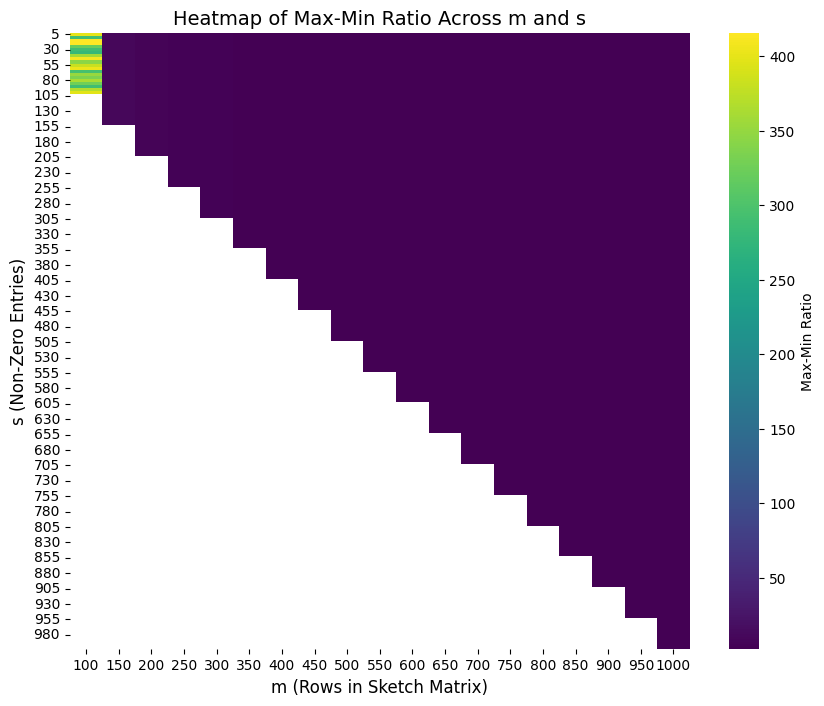

In [42]:
pivot_table = results_df.pivot(index="s", columns="m", values="max_min_ratio")

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap="viridis", annot=False, cbar_kws={"label": "Max-Min Ratio"})

plt.title("Heatmap of Max-Min Ratio Across m and s", fontsize=14)
plt.xlabel("m (Rows in Sketch Matrix)", fontsize=12)
plt.ylabel("s (Non-Zero Entries)", fontsize=12)

plt.show()

In [40]:
sorted_results = results_df.sort_values(by="max_min_ratio", ascending=True)
sorted_results_cleaned = sorted_results.drop(columns=["min_svd_list", "max_svd_list"])

# Select the top few rows with the smallest max_min_ratio
top_few_rows = sorted_results_cleaned.head(5)

top_few_rows

,m,s,avg_time,min_svd_list_length,avg_min_svd,avg_max_svd,max_min_ratio
2088,1000,995,0.261507,20,18.772831,45.487632,2.423057
1973,1000,420,0.154606,20,18.784610,45.525744,2.423566
2023,1000,670,0.206100,20,18.748343,45.549444,2.429518
1939,1000,250,0.120844,20,18.755563,45.574524,2.429920
1911,1000,110,0.097502,20,18.808409,45.727006,2.431200


In [44]:
#rows where s = m
temp = results_df[results_df["s"] == results_df["m"]]
temp = temp.drop(columns=["min_svd_list", "max_svd_list"])

temp

,m,s,avg_time,min_svd_list_length,avg_min_svd,avg_max_svd,max_min_ratio
19,100,100,0.046571,20,0.161748,64.346166,397.817427
49,150,150,0.070080,20,5.977589,59.066950,9.881400
89,200,200,0.081537,20,8.820922,56.407026,6.394686
139,250,250,0.094998,20,11.183144,53.883050,4.818238
199,300,300,0.108455,20,12.649263,52.263612,4.131752
269,350,350,0.122334,20,13.825524,51.261788,3.707764
349,400,400,0.134991,20,14.500955,50.501690,3.482646
439,450,450,0.143624,20,15.357429,49.550196,3.226464
539,500,500,0.169278,20,15.753423,48.801734,3.097849
649,550,550,0.165957,20,16.292950,48.456342,2.974068


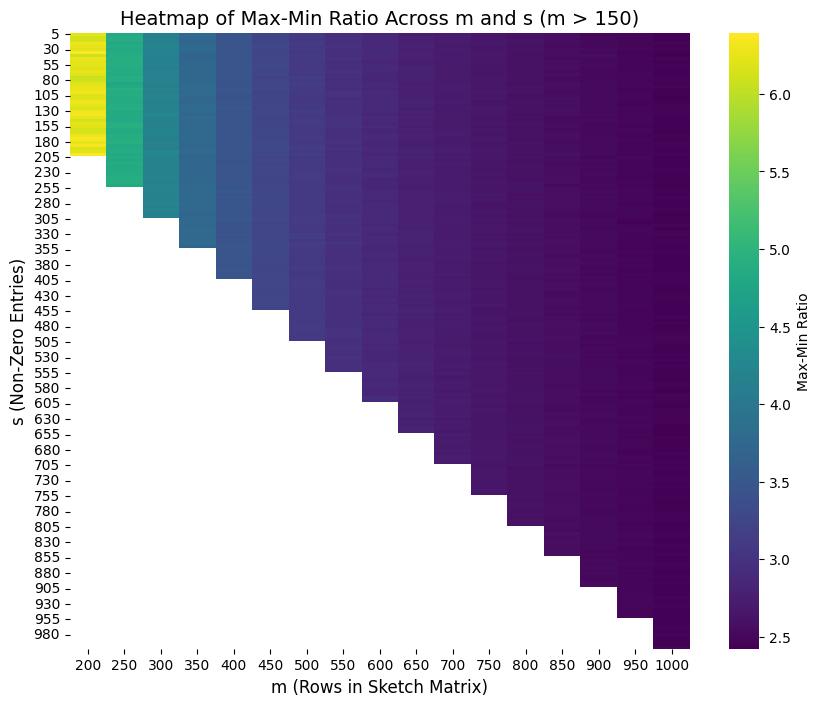

In [45]:
# Filter the results for m > 150
filtered_results_df = results_df[results_df['m'] > 150]

# Create the pivot table based on the filtered results
pivot_table_filtered = filtered_results_df.pivot(index="s", columns="m", values="max_min_ratio")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table_filtered, cmap="viridis", annot=False, cbar_kws={"label": "Max-Min Ratio"})

plt.title("Heatmap of Max-Min Ratio Across m and s (m > 150)", fontsize=14)
plt.xlabel("m (Rows in Sketch Matrix)", fontsize=12)
plt.ylabel("s (Non-Zero Entries)", fontsize=12)

plt.show()


In [49]:
#simulation for U matrix with orthogonal columns
#initialise
#n_row is the row of U and dimension of S
n_rows = 1000    
d = 100          
n_sketches = 20
m_values = list(range(100, 1001, 50))

#U matrix
temp_matrix = np.random.randn(n_rows, d)
U, _ = np.linalg.qr(temp_matrix) 
original_svd_min, original_svd_max = compute_svd(U)

In [50]:
orthogonality_check = np.allclose(U.T @ U, np.eye(d))
orthogonality_check

True

In [51]:
#simulation for U with orthogonl matrix
results = []
for m in m_values:
    s_values = list(range(5, m + 1, 5))
    for s in s_values:
        #temp storing of results
        min_vals = []
        max_vals = []
        total_time = 0
        # Generate multiple sketches for the given (m, s)
        for i in range(n_sketches):
            start_time = time.time()
            # Generate sketch matrix S
            S = sketch_matrix(m, n_rows, s)
            SU = S @ U
            # Compute min and max svd of SU
            min_svd, max_svd = compute_svd(SU)
            min_vals.append(min_svd)
            max_vals.append(max_svd)
            end_time = time.time()  # End timing
            total_time += (end_time - start_time)
            
        results.append({
            "m": m,
            "s": s,
            "min_svd_list": min_vals,
            "max_svd_list": max_vals,
            "avg_time": total_time / n_sketches
        })

#dataframe to store results
results2_df = pd.DataFrame(results)

In [52]:
results2_df.to_csv("implementation results2 orthogonal columns.csv", index=False)

In [53]:
results2_df

,m,s,min_svd_list,max_svd_list,avg_time
0,100,5,"[0.0016379128380206885, 0.0026012156171652417,...","[2.0005370247155865, 1.9932870004847085, 1.967...",0.063990
1,100,10,"[0.007772917462901248, 0.010607650957772871, 1...","[2.023539151558161, 1.93389694994069, 1.922914...",0.070264
2,100,15,"[0.00032703602118173855, 0.0036573426172732894...","[1.960376034690734, 2.009233841599933, 1.98387...",0.071904
3,100,20,"[0.014170505562135585, 0.0009217130841547507, ...","[1.9597291996640078, 1.8945002847731969, 1.974...",0.047944
4,100,25,"[0.002702522790162387, 0.018502783265737798, 0...","[1.9664501153185914, 1.9318289266624198, 1.934...",0.059425
...,...,...,...,...,...
2085,1000,980,"[0.6951822965126683, 0.6868372408469556, 0.689...","[1.3001677844643387, 1.3055265076595404, 1.309...",0.276503
2086,1000,985,"[0.6818234714392961, 0.6816137437322833, 0.698...","[1.2947007997764806, 1.2982839473230665, 1.312...",0.250831
2087,1000,990,"[0.6856173742755887, 0.6913129644368509, 0.700...","[1.309825886688543, 1.297809462247449, 1.29771...",0.260299
2088,1000,995,"[0.6948823017214759, 0.6974762162061034, 0.698...","[1.3015967411331586, 1.310378750160398, 1.3042...",0.258883


In [54]:
results2_df['avg_min_svd'] = results2_df['min_svd_list'].apply(np.mean)

# Calculate the average of the max_svd_list for each row
results2_df['avg_max_svd'] = results2_df['max_svd_list'].apply(np.mean)
results2_df['max_min_ratio'] = results2_df['avg_max_svd']/results2_df['avg_min_svd']
results2_df

,m,s,min_svd_list,max_svd_list,avg_time,avg_min_svd,avg_max_svd,max_min_ratio
0,100,5,"[0.0016379128380206885, 0.0026012156171652417,...","[2.0005370247155865, 1.9932870004847085, 1.967...",0.063990,0.005839,1.973528,337.963828
1,100,10,"[0.007772917462901248, 0.010607650957772871, 1...","[2.023539151558161, 1.93389694994069, 1.922914...",0.070264,0.007291,1.963861,269.361176
2,100,15,"[0.00032703602118173855, 0.0036573426172732894...","[1.960376034690734, 2.009233841599933, 1.98387...",0.071904,0.005619,1.959900,348.803600
3,100,20,"[0.014170505562135585, 0.0009217130841547507, ...","[1.9597291996640078, 1.8945002847731969, 1.974...",0.047944,0.004185,1.945680,464.874502
4,100,25,"[0.002702522790162387, 0.018502783265737798, 0...","[1.9664501153185914, 1.9318289266624198, 1.934...",0.059425,0.007715,1.961850,254.288474
...,...,...,...,...,...,...,...,...
2085,1000,980,"[0.6951822965126683, 0.6868372408469556, 0.689...","[1.3001677844643387, 1.3055265076595404, 1.309...",0.276503,0.690172,1.307576,1.894565
2086,1000,985,"[0.6818234714392961, 0.6816137437322833, 0.698...","[1.2947007997764806, 1.2982839473230665, 1.312...",0.250831,0.692413,1.306515,1.886901
2087,1000,990,"[0.6856173742755887, 0.6913129644368509, 0.700...","[1.309825886688543, 1.297809462247449, 1.29771...",0.260299,0.689344,1.305767,1.894217
2088,1000,995,"[0.6948823017214759, 0.6974762162061034, 0.698...","[1.3015967411331586, 1.310378750160398, 1.3042...",0.258883,0.690246,1.306607,1.892958


In [55]:
sorted_results2 = results2_df.sort_values(by="max_min_ratio", ascending=True)
sorted_results2_cleaned = sorted_results2.drop(columns=["min_svd_list", "max_svd_list"])

# Select the top few rows with the smallest max_min_ratio
top_few_rows2 = sorted_results2_cleaned.head(5)

top_few_rows2

,m,s,avg_time,avg_min_svd,avg_max_svd,max_min_ratio
1910,1000,105,0.095834,0.695978,1.299495,1.867151
2007,1000,590,0.184947,0.694069,1.299350,1.872077
1890,1000,5,0.074998,0.696619,1.304249,1.872254
2014,1000,625,0.189488,0.696483,1.304826,1.873450
1996,1000,535,0.171890,0.695266,1.302711,1.873688


In [64]:
#temp
#simulation for U matrix with orthogonal columns
#initialise
#n_row is the row of U and dimension of S
n_rows = 1000  
d = 100      
n_sketches = 100
m_values = list(range(950, 1001, 50))

#U matrix
temp_matrix = np.random.randn(n_rows, d)
U, _ = np.linalg.qr(temp_matrix)

#simulation for U with orthogonl matrix
results = []
for m in m_values:
    s_values = list(range(5, m + 1, 5))
    for s in s_values:
        #temp storing of results
        min_vals = []
        max_vals = []
        total_time = 0
        # Generate multiple sketches for the given (m, s)
        for i in range(n_sketches):
            start_time = time.time()
            # Generate sketch matrix S
            S = sketch_matrix(m, n_rows, s)
            SU = S @ U
            # Compute min and max svd of SU
            min_svd, max_svd = compute_svd(SU)
            min_vals.append(min_svd)
            max_vals.append(max_svd)
            end_time = time.time()  # End timing
            total_time += (end_time - start_time)
            
        results.append({
            "m": m,
            "s": s,
            "min_svd_list": min_vals,
            "max_svd_list": max_vals,
            "avg_time": total_time / n_sketches
        })

#dataframe to store results
results3_df = pd.DataFrame(results)

In [65]:
results3_df

,m,s,min_svd_list,max_svd_list,avg_time
0,950,5,"[0.6866204534348547, 0.6938071896382982, 0.678...","[1.32325986685258, 1.3267431163370451, 1.33553...",0.070906
1,950,10,"[0.6959344349760921, 0.6880753978927218, 0.688...","[1.325328064582457, 1.308852109603231, 1.32727...",0.073166
2,950,15,"[0.6789295271690544, 0.6787661417036599, 0.681...","[1.3195867638051746, 1.3098372756428134, 1.296...",0.076167
3,950,20,"[0.6891753790369788, 0.679140913367249, 0.6893...","[1.3021321930165595, 1.3175733929063767, 1.300...",0.077333
4,950,25,"[0.6926649277033888, 0.6886170215603246, 0.679...","[1.3126536457718894, 1.304669687046633, 1.2930...",0.077335
...,...,...,...,...,...
385,1000,980,"[0.6888899593964558, 0.687903133792746, 0.7027...","[1.3022331485566736, 1.3107485171140585, 1.318...",0.269717
386,1000,985,"[0.696560607428636, 0.695993911237143, 0.68326...","[1.29766252866287, 1.302412680118383, 1.311767...",0.260144
387,1000,990,"[0.6906053186430916, 0.6919549581483665, 0.695...","[1.304273326429048, 1.3081497498206218, 1.2972...",0.262366
388,1000,995,"[0.7005667628880194, 0.6915283544396027, 0.695...","[1.3232863675378, 1.3108901445203713, 1.296625...",0.277833


In [66]:
results3_df['avg_min_svd'] = results3_df['min_svd_list'].apply(np.mean)

# Calculate the average of the max_svd_list for each row
results3_df['avg_max_svd'] = results3_df['max_svd_list'].apply(np.mean)
results3_df['max_min_ratio'] = results3_df['avg_max_svd']/results3_df['avg_min_svd']
sorted_results3 = results3_df.sort_values(by="max_min_ratio", ascending=True)
sorted_results3_cleaned = sorted_results3.drop(columns=["min_svd_list", "max_svd_list"])

# Select the top few rows with the smallest max_min_ratio
top_few_rows3 = sorted_results3_cleaned.head(5)

top_few_rows3

,m,s,avg_time,avg_min_svd,avg_max_svd,max_min_ratio
314,1000,625,0.193940,0.693396,1.302879,1.878984
201,1000,60,0.084537,0.694203,1.304904,1.879716
221,1000,160,0.105529,0.693228,1.303073,1.879719
372,1000,915,0.249647,0.693872,1.304652,1.880248
352,1000,815,0.235075,0.693416,1.303797,1.880253


Trying with larger M values and smaller dimension

In [71]:
#temp
#simulation for U matrix with orthogonal columns
#initialise
#n_row is the row of U and dimension of S
n_rows = 2000
d = 10      
n_sketches = 20
m_values = list(range(1500, 2001, 50))

#U matrix
temp_matrix = np.random.randn(n_rows, d)
U, _ = np.linalg.qr(temp_matrix)

#simulation for U with orthogonl matrix
results = []
for m in m_values:
    s_values = list(range(5, m + 1, 50))
    for s in s_values:
        #temp storing of results
        min_vals = []
        max_vals = []
        total_time = 0
        # Generate multiple sketches for the given (m, s)
        for i in range(n_sketches):
            start_time = time.time()
            # Generate sketch matrix S
            S = sketch_matrix(m, n_rows, s)
            SU = S @ U
            # Compute min and max svd of SU
            min_svd, max_svd = compute_svd(SU)
            min_vals.append(min_svd)
            max_vals.append(max_svd)
            end_time = time.time()  # End timing
            total_time += (end_time - start_time)
            
        results.append({
            "m": m,
            "s": s,
            "min_svd_list": min_vals,
            "max_svd_list": max_vals,
            "avg_time": total_time / n_sketches
        })

#dataframe to store results
results4_df = pd.DataFrame(results)

In [72]:
results4_df['avg_min_svd'] = results4_df['min_svd_list'].apply(np.mean)

# Calculate the average of the max_svd_list for each row
results4_df['avg_max_svd'] = results4_df['max_svd_list'].apply(np.mean)
results4_df['max_min_ratio'] = results4_df['avg_max_svd']/results4_df['avg_min_svd']
sorted_results4 = results4_df.sort_values(by="max_min_ratio", ascending=True)
sorted_results4_cleaned = sorted_results4.drop(columns=["min_svd_list", "max_svd_list"])

# Select the top few rows with the smallest max_min_ratio
top_few_rows4 = sorted_results4_cleaned.head(5)

top_few_rows4

,m,s,avg_time,avg_min_svd,avg_max_svd,max_min_ratio
362,2000,855,0.449987,0.943339,1.054432,1.117766
376,2000,1555,0.716602,0.943588,1.056498,1.119660
353,2000,405,0.278151,0.941497,1.055808,1.121415
375,2000,1505,0.736697,0.942833,1.057815,1.121953
384,2000,1955,0.865646,0.942737,1.057933,1.122194


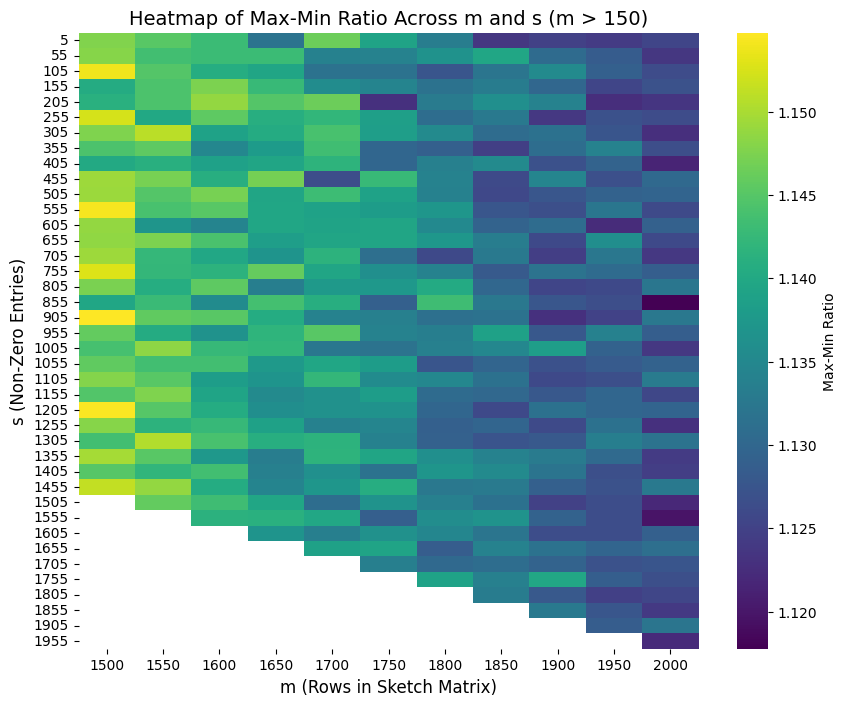

In [75]:
##Visualisation
# Filter the results for m > 150
filtered_results4_df = results4_df[results4_df['m'] > 150]

# Create the pivot table based on the filtered results
pivot_table4_filtered = filtered_results4_df.pivot(index="s", columns="m", values="max_min_ratio")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table4_filtered, cmap="viridis", annot=False, cbar_kws={"label": "Max-Min Ratio"})

plt.title("Heatmap of Max-Min Ratio Across m and s (m > 150)", fontsize=14)
plt.xlabel("m (Rows in Sketch Matrix)", fontsize=12)
plt.ylabel("s (Non-Zero Entries)", fontsize=12)

plt.show()

In [78]:
n_rows = 1000    
d = 100       
S = sketch_matrix (n_rows , d , n_rows)
min_val, max_val = compute_svd(S)

In [89]:
n_rows = 10000
d = 100       
S = sketch_matrix (n_rows , d , n_rows)
min_val, max_val = compute_svd(S)
min_val, max_val

(0.9058353299092694, 1.0957817266853433)

In [113]:
n_rows = 10000
d = 100
non_zero = list(range(1, 101, 2))
results = []
for i in non_zero:
    S = sketch_matrix2(n_rows , d , i)
    min_svd, max_svd = compute_svd(S)
    results.append({
            "m": n_rows,
            "s": i,
            "min_svd_list": min_svd,
            "max_svd_list": max_svd,
        })

In [114]:
temp_df = pd.DataFrame(results)

In [115]:
temp_df['ratio'] = temp_df['max_svd_list']/temp_df['min_svd_list']

In [116]:
temp_df

,m,s,min_svd_list,max_svd_list,ratio
0,10000,1,1.000000,1.000000,1.000000
1,10000,3,0.816497,1.154701,1.414214
2,10000,5,0.846851,1.132626,1.337456
3,10000,7,0.848324,1.163400,1.371410
4,10000,9,0.868424,1.133164,1.304852
5,10000,11,0.847101,1.157828,1.366812
6,10000,13,0.893597,1.116107,1.249005
7,10000,15,0.891895,1.097508,1.230536
8,10000,17,0.894501,1.099147,1.228782
9,10000,19,0.890735,1.122778,1.260507


not much change after sparisty 10

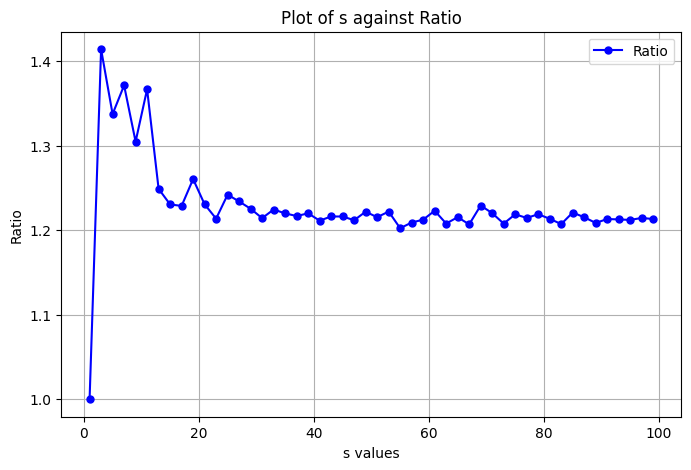

In [117]:
plt.figure(figsize=(8, 5))
plt.plot(temp_df["s"], temp_df["ratio"], marker='o', linestyle='-', color='b', markersize=5, label='Ratio')

# Labels and title
plt.xlabel("s values")
plt.ylabel("Ratio")
plt.title("Plot of s against Ratio")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [118]:
def svd_sketching_error(S):
    """
    Computes the SVD-based sketching error:
    - Deviation of max singular value from 1
    - Deviation of min singular value from 1

    Parameters:
    S (numpy.ndarray): The sketch matrix.

    Returns:
    tuple: (1 - min_singular_value, 1 - max_singular_value)
    """
    # Compute singular values
    singular_values = np.linalg.svd(S, compute_uv=False)

    # Min and max singular values
    min_svd = np.min(singular_values)
    max_svd = np.max(singular_values)

    # Compute deviations from 1
    min_svd_error = abs(1 - min_svd)
    max_svd_error = abs(1 - max_svd)

    return min_svd_error, max_svd_error

In [119]:
temp_df['min_svd_error'] = abs(1 - temp_df["min_svd_list"])
temp_df["max_svd_error"] = abs(1 - temp_df["max_svd_list"])
temp_df

,m,s,min_svd_list,max_svd_list,ratio,min_svd_error,max_svd_error
0,10000,1,1.000000,1.000000,1.000000,0.000000,0.000000
1,10000,3,0.816497,1.154701,1.414214,0.183503,0.154701
2,10000,5,0.846851,1.132626,1.337456,0.153149,0.132626
3,10000,7,0.848324,1.163400,1.371410,0.151676,0.163400
4,10000,9,0.868424,1.133164,1.304852,0.131576,0.133164
5,10000,11,0.847101,1.157828,1.366812,0.152899,0.157828
6,10000,13,0.893597,1.116107,1.249005,0.106403,0.116107
7,10000,15,0.891895,1.097508,1.230536,0.108105,0.097508
8,10000,17,0.894501,1.099147,1.228782,0.105499,0.099147
9,10000,19,0.890735,1.122778,1.260507,0.109265,0.122778


In [121]:
temp_df['sketching_error'] = temp_df[["min_svd_error", "max_svd_error"]].max(axis=1)
temp_df.head()

,m,s,min_svd_list,max_svd_list,ratio,min_svd_error,max_svd_error,sketching_error
0,10000,1,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
1,10000,3,0.816497,1.154701,1.414214,0.183503,0.154701,0.183503
2,10000,5,0.846851,1.132626,1.337456,0.153149,0.132626,0.153149
3,10000,7,0.848324,1.163400,1.371410,0.151676,0.163400,0.163400
4,10000,9,0.868424,1.133164,1.304852,0.131576,0.133164,0.133164


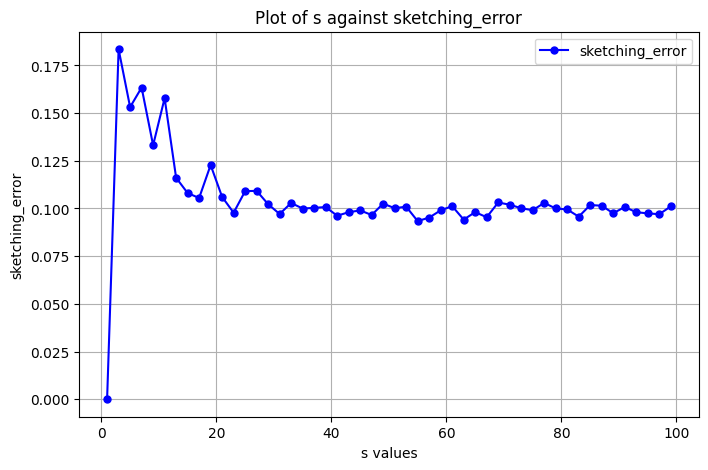

In [123]:
plt.figure(figsize=(8, 5))
plt.plot(temp_df["s"], temp_df["sketching_error"], marker='o', linestyle='-', color='b', markersize=5, label='sketching_error')

# Labels and title
plt.xlabel("s values")
plt.ylabel("sketching_error")
plt.title("Plot of s against sketching_error")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [126]:
n_rows = list(range(1000, 4001, 50))
d = 100
results = []
for i in n_rows:
    S = sketch_matrix2(i , d , i)
    min_svd, max_svd = compute_svd(S)
    results.append({
            "m": i,
            "s": i,
            "min_svd_list": min_svd,
            "max_svd_list": max_svd,
        })
temp_df2 = pd.DataFrame(results)

In [128]:
temp_df2.head()

,m,s,min_svd_list,max_svd_list
0,1000,1000,0.695293,1.294081
1,1050,1050,0.702877,1.302937
2,1100,1100,0.718485,1.283982
3,1150,1150,0.714174,1.278424
4,1200,1200,0.731198,1.268448


In [129]:
temp_df2['ratio'] = temp_df2['max_svd_list']/temp_df2['min_svd_list']
temp_df2['min_svd_error'] = abs(1 - temp_df2["min_svd_list"])
temp_df2["max_svd_error"] = abs(1 - temp_df2["max_svd_list"])
temp_df2['sketching_error'] = temp_df2[["min_svd_error", "max_svd_error"]].max(axis=1)
temp_df2.head()

,m,s,min_svd_list,max_svd_list,ratio,min_svd_error,max_svd_error,sketching_error
0,1000,1000,0.695293,1.294081,1.861202,0.304707,0.294081,0.304707
1,1050,1050,0.702877,1.302937,1.853721,0.297123,0.302937,0.302937
2,1100,1100,0.718485,1.283982,1.787070,0.281515,0.283982,0.283982
3,1150,1150,0.714174,1.278424,1.790073,0.285826,0.278424,0.285826
4,1200,1200,0.731198,1.268448,1.734752,0.268802,0.268448,0.268802


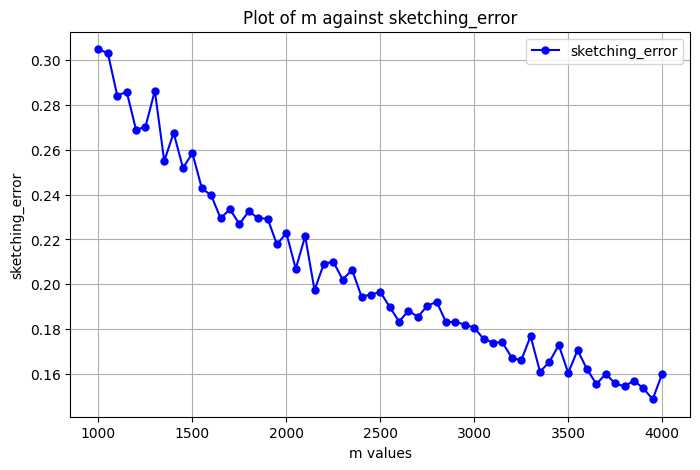

In [130]:
plt.figure(figsize=(8, 5))
plt.plot(temp_df2["m"], temp_df2["sketching_error"], marker='o', linestyle='-', color='b', markersize=5, label='sketching_error')

# Labels and title
plt.xlabel("m values")
plt.ylabel("sketching_error")
plt.title("Plot of m against sketching_error")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [131]:
temp_df2["inv_squared_sketching_error"] = 1 / (temp_df2["sketching_error"] ** 2)
temp_df2.head()

,m,s,min_svd_list,max_svd_list,ratio,min_svd_error,max_svd_error,sketching_error,inv_squared_sketching_error
0,1000,1000,0.695293,1.294081,1.861202,0.304707,0.294081,0.304707,10.770502
1,1050,1050,0.702877,1.302937,1.853721,0.297123,0.302937,0.302937,10.896686
2,1100,1100,0.718485,1.283982,1.787070,0.281515,0.283982,0.283982,12.399903
3,1150,1150,0.714174,1.278424,1.790073,0.285826,0.278424,0.285826,12.240414
4,1200,1200,0.731198,1.268448,1.734752,0.268802,0.268448,0.268802,13.840001


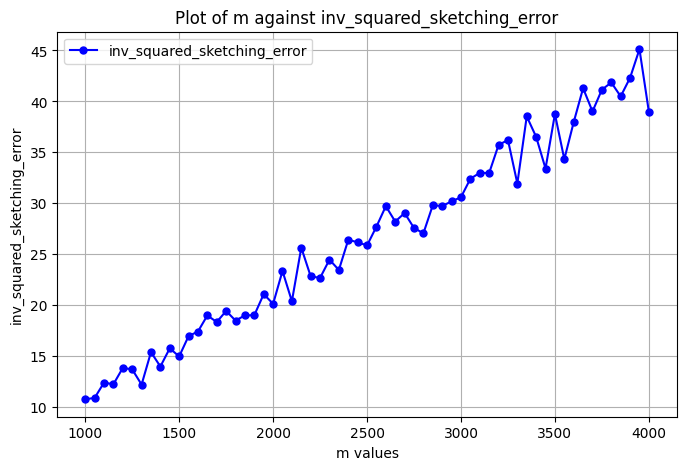

In [132]:
#dense
plt.figure(figsize=(8, 5))
plt.plot(temp_df2["m"], temp_df2["inv_squared_sketching_error"], marker='o', linestyle='-', color='b', markersize=5, label='inv_squared_sketching_error')

# Labels and title
plt.xlabel("m values")
plt.ylabel("inv_squared_sketching_error")
plt.title("Plot of m against inv_squared_sketching_error")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [133]:
#with a sparse matrix
n_rows = list(range(1000, 4001, 50))
d = 100
results = []
for i in n_rows:
    #from prev result 
    S = sketch_matrix2(i , d , 10)
    min_svd, max_svd = compute_svd(S)
    results.append({
            "m": i,
            "s": 10,
            "min_svd_list": min_svd,
            "max_svd_list": max_svd,
        })
temp_df3 = pd.DataFrame(results)

In [135]:
temp_df3['ratio'] = temp_df3['max_svd_list']/temp_df3['min_svd_list']
temp_df3['min_svd_error'] = abs(1 - temp_df3["min_svd_list"])
temp_df3["max_svd_error"] = abs(1 - temp_df3["max_svd_list"])
temp_df3['sketching_error'] = temp_df3[["min_svd_error", "max_svd_error"]].max(axis=1)
temp_df3.head()

,m,s,min_svd_list,max_svd_list,ratio,min_svd_error,max_svd_error,sketching_error
0,1000,10,0.686059,1.302614,1.898692,0.313941,0.302614,0.313941
1,1050,10,0.688035,1.334267,1.939242,0.311965,0.334267,0.334267
2,1100,10,0.703311,1.301771,1.850917,0.296689,0.301771,0.301771
3,1150,10,0.696925,1.308197,1.877098,0.303075,0.308197,0.308197
4,1200,10,0.717577,1.282368,1.787081,0.282423,0.282368,0.282423


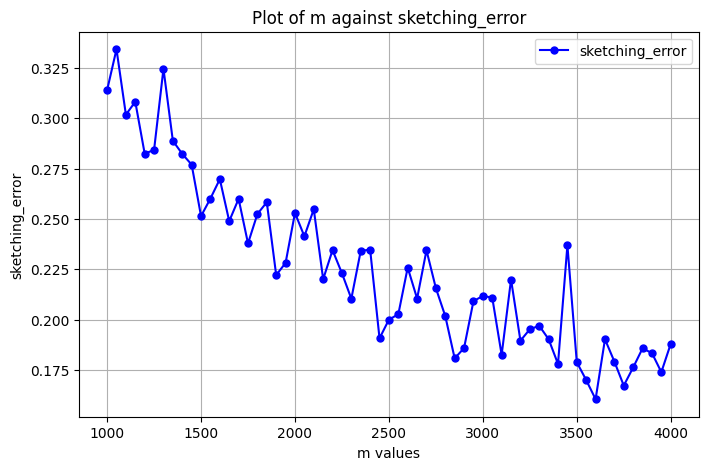

In [136]:
plt.figure(figsize=(8, 5))
plt.plot(temp_df3["m"], temp_df3["sketching_error"], marker='o', linestyle='-', color='b', markersize=5, label='sketching_error')

# Labels and title
plt.xlabel("m values")
plt.ylabel("sketching_error")
plt.title("Plot of m against sketching_error")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

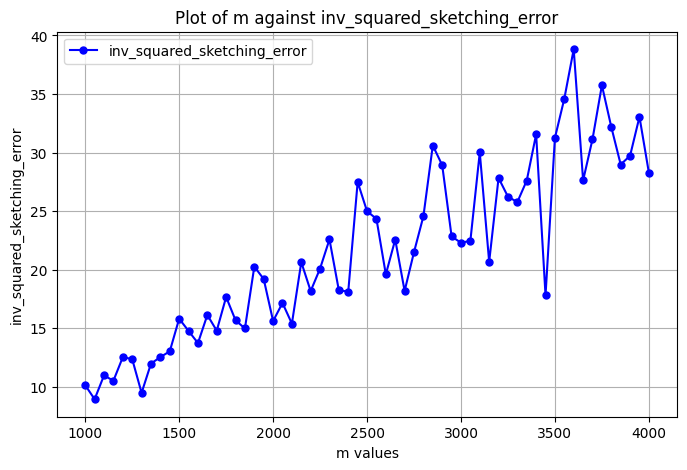

In [137]:
temp_df3["inv_squared_sketching_error"] = 1 / (temp_df3["sketching_error"] ** 2)
plt.figure(figsize=(8, 5))
plt.plot(temp_df3["m"], temp_df3["inv_squared_sketching_error"], marker='o', linestyle='-', color='b', markersize=5, label='inv_squared_sketching_error')

# Labels and title
plt.xlabel("m values")
plt.ylabel("inv_squared_sketching_error")
plt.title("Plot of m against inv_squared_sketching_error")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Trying with matrix u with orthogonal columns

In [141]:
#U matrix : n x d
#S matrix : m x n
n_rows = 10000
d = 100
m_values = list(range(5000, 10001, 50))

#U matrix
temp_matrix = np.random.randn(n_rows, d)
U, _ = np.linalg.qr(temp_matrix)

#simulation for U with orthogonl matrix
results = []
for m in m_values:
    #temp storing of results
    # Generate sketch matrix S
    S = sketch_matrix2(m, n_rows, 10)
    SU = S @ U
    # Compute min and max svd of SU
    min_svd, max_svd = compute_svd(SU)
            
    results.append({
            "m": m,
            "s": 10,
            "min_svd": min_svd,
            "max_svd": max_svd,
        })

#dataframe to store results
new_df = pd.DataFrame(results)

In [142]:
new_df

,m,s,min_svd,max_svd
0,5000,10,0.867084,1.130642
1,5050,10,0.863194,1.142741
2,5100,10,0.866968,1.135623
3,5150,10,0.866228,1.134105
4,5200,10,0.868729,1.130722
...,...,...,...,...
96,9800,10,0.898838,1.098686
97,9850,10,0.896072,1.094475
98,9900,10,0.902095,1.095545
99,9950,10,0.900864,1.098112


In [143]:
new_df['ratio'] = new_df['max_svd']/new_df['min_svd']
new_df['min_svd_error'] = abs(1 - new_df["min_svd"])
new_df["max_svd_error"] = abs(1 - new_df["max_svd"])
new_df['sketching_error'] = new_df[["min_svd_error", "max_svd_error"]].max(axis=1)
new_df.head()

,m,s,min_svd,max_svd,ratio,min_svd_error,max_svd_error,sketching_error
0,5000,10,0.867084,1.130642,1.303959,0.132916,0.130642,0.132916
1,5050,10,0.863194,1.142741,1.323852,0.136806,0.142741,0.142741
2,5100,10,0.866968,1.135623,1.309880,0.133032,0.135623,0.135623
3,5150,10,0.866228,1.134105,1.309246,0.133772,0.134105,0.134105
4,5200,10,0.868729,1.130722,1.301583,0.131271,0.130722,0.131271


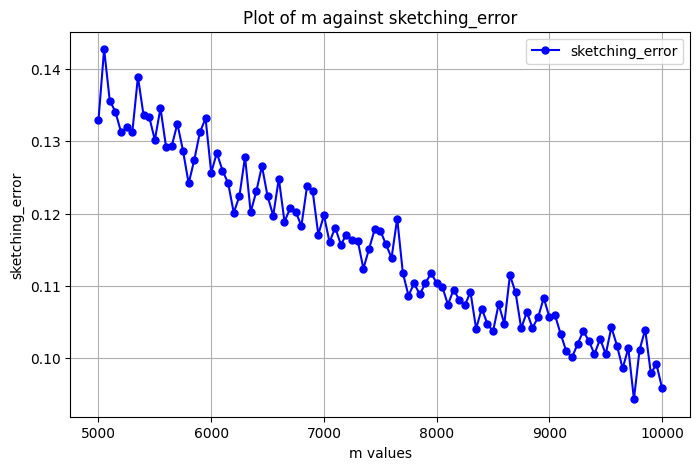

In [144]:
plt.figure(figsize=(8, 5))
plt.plot(new_df["m"], new_df["sketching_error"], marker='o', linestyle='-', color='b', markersize=5, label='sketching_error')

# Labels and title
plt.xlabel("m values")
plt.ylabel("sketching_error")
plt.title("Plot of m against sketching_error")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

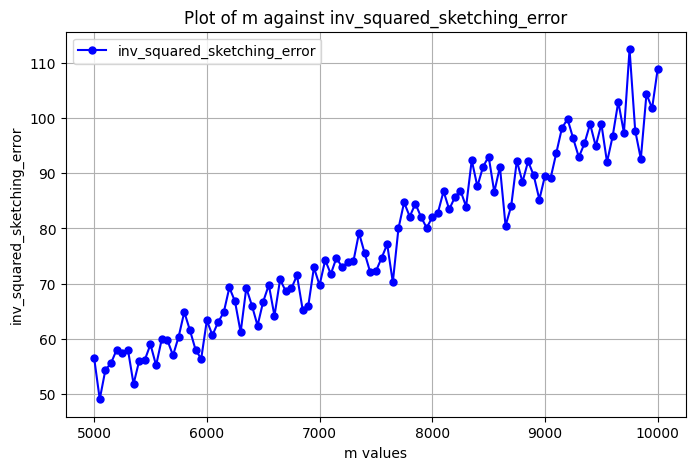

In [145]:
new_df["inv_squared_sketching_error"] = 1 / (new_df["sketching_error"] ** 2)
plt.figure(figsize=(8, 5))
plt.plot(new_df["m"], new_df["inv_squared_sketching_error"], marker='o', linestyle='-', color='b', markersize=5, label='inv_squared_sketching_error')

# Labels and title
plt.xlabel("m values")
plt.ylabel("inv_squared_sketching_error")
plt.title("Plot of m against inv_squared_sketching_error")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [146]:
orthogonality_check = np.allclose(U.T @ U, np.eye(d))
orthogonality_check

True

In [8]:
#U matrix : n x d
#S matrix : m x n
n_rows = 100000
d = 100
m_values = list(range(1000, 10001, 100))

#U matrix
temp_matrix = np.random.randn(n_rows, d)
U, _ = np.linalg.qr(temp_matrix)

#simulation for U with orthogonl matrix
results = []
for m in m_values:
    #temp storing of results
    # Generate sketch matrix S
    S = sketch_matrix2(m, n_rows, 10)
    SU = S @ U
    # Compute min and max svd of SU
    min_svd, max_svd = compute_svd(SU)
            
    results.append({
            "m": m,
            "s": 10,
            "min_svd": min_svd,
            "max_svd": max_svd,
        })

#dataframe to store results
new_df = pd.DataFrame(results)

In [9]:
new_df['ratio'] = new_df['max_svd']/new_df['min_svd']
new_df['min_svd_error'] = abs(1 - new_df["min_svd"])
new_df["max_svd_error"] = abs(1 - new_df["max_svd"])
new_df['sketching_error'] = new_df[["min_svd_error", "max_svd_error"]].max(axis=1)

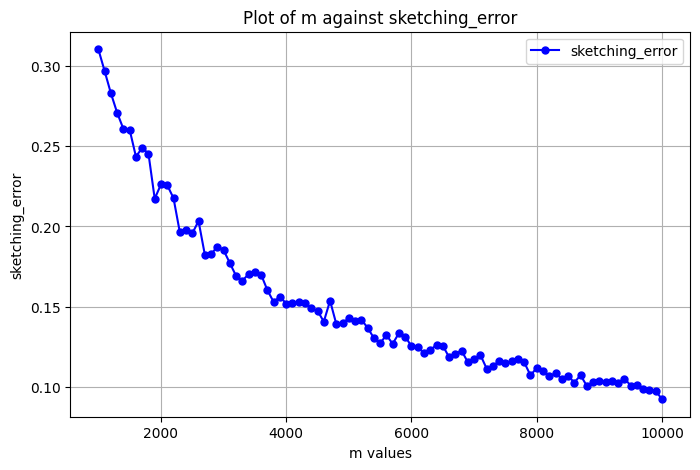

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(new_df["m"], new_df["sketching_error"], marker='o', linestyle='-', color='b', markersize=5, label='sketching_error')

# Labels and title
plt.xlabel("m values")
plt.ylabel("sketching_error")
plt.title("Plot of m against sketching_error")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

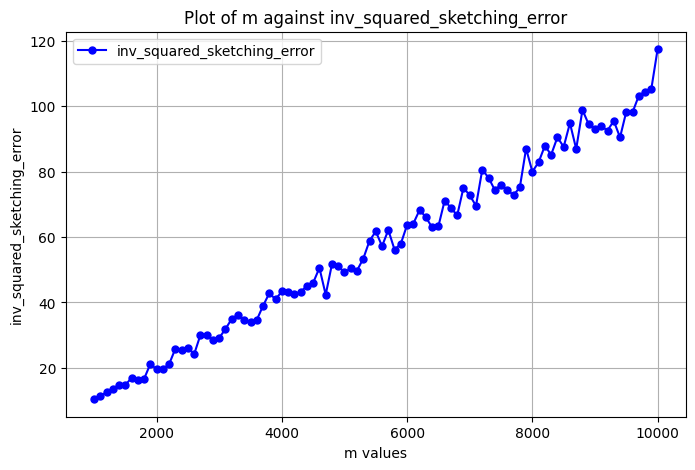

In [11]:
new_df["inv_squared_sketching_error"] = 1 / (new_df["sketching_error"] ** 2)
plt.figure(figsize=(8, 5))
plt.plot(new_df["m"], new_df["inv_squared_sketching_error"], marker='o', linestyle='-', color='b', markersize=5, label='inv_squared_sketching_error')

# Labels and title
plt.xlabel("m values")
plt.ylabel("inv_squared_sketching_error")
plt.title("Plot of m against inv_squared_sketching_error")
plt.legend()
plt.grid(True)

# Show plot
plt.show()